In [ ]:
#TOPIC-LOAN STATUS PREDICTION
#TCR ML WITH PY FINAL PROJECT


In [ ]:
#Importing the required Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
dataset=pd.read_csv('/content/drive/MyDrive/ML with PY/final project/Loan_status.zip')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [57]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [59]:
dataset.__len__()

614

In [60]:
dataset.shape

(614, 13)

In [61]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [62]:
#Exploration of dataset

In [63]:
dataset.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
#Checking for null values

dataset=dataset.dropna()

In [66]:
sns.set_style("darkgrid")

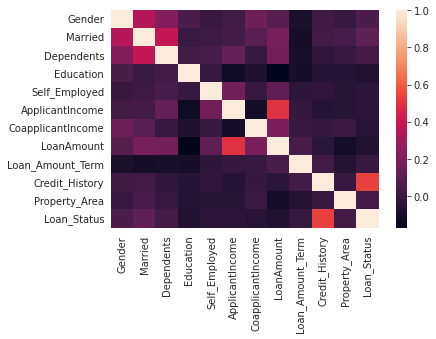

In [97]:
sns.heatmap(dataset.corr())

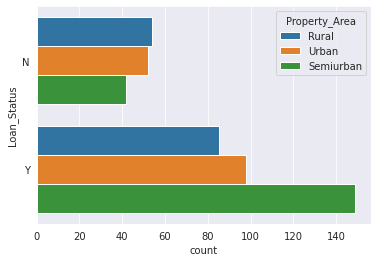

In [67]:
sns.countplot(y="Loan_Status", hue="Property_Area",data=dataset)

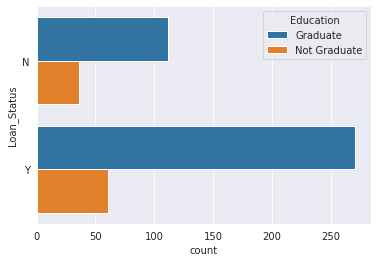

In [68]:
sns.countplot(y="Loan_Status",hue="Education",data=dataset)

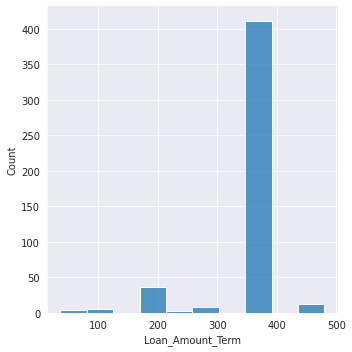

In [69]:
sns.displot(dataset['Loan_Amount_Term'].dropna(),kde=False,bins=10)

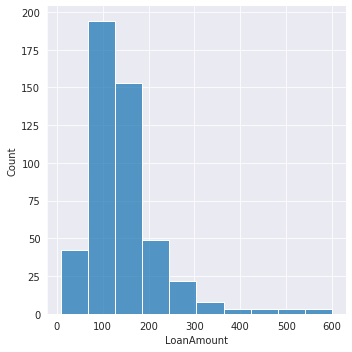

In [70]:
sns.displot(dataset['LoanAmount'].dropna(),kde=False,bins=10)

In [157]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.8 KB


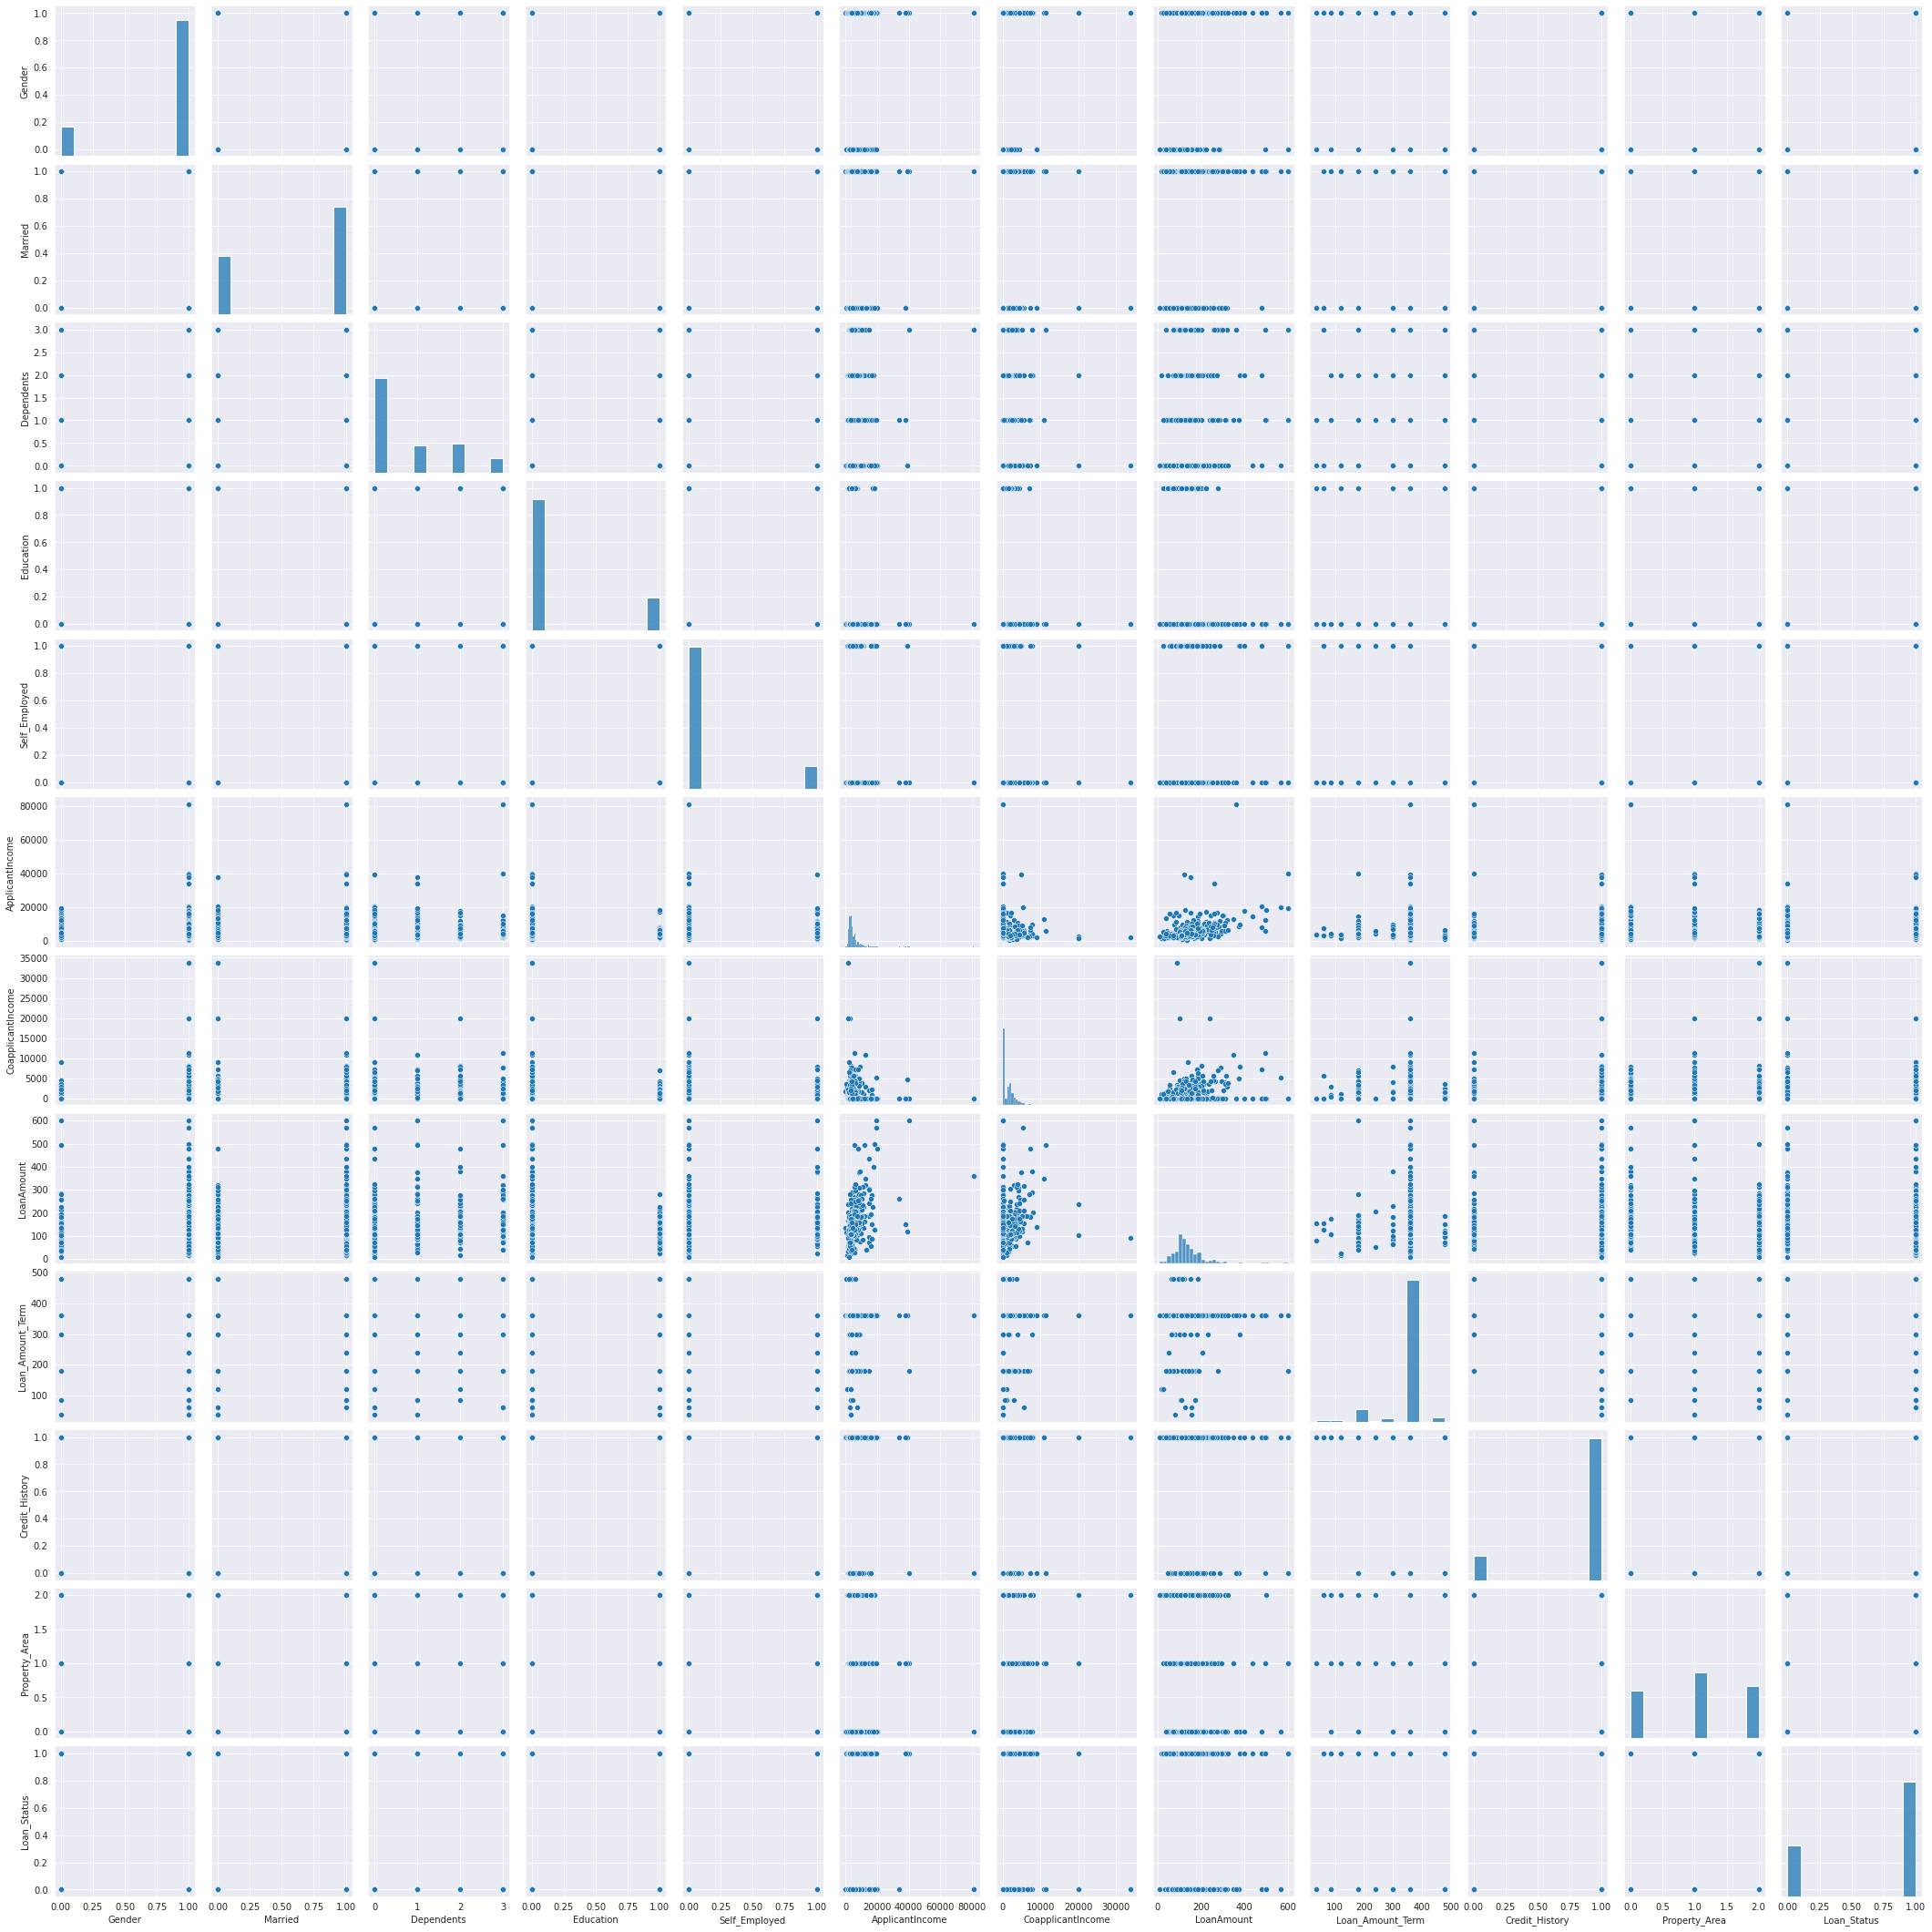

In [158]:
sns.pairplot(dataset)

In [72]:
#Label Encoding


In [73]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()
dataset['Married']=le.fit_transform(dataset['Married'])
dataset['Self_Employed']=le.fit_transform(dataset['Self_Employed'])
dataset['Loan_Status']=le.fit_transform(dataset['Loan_Status'])
dataset['Education']=le.fit_transform(dataset['Education'])
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset['Property_Area']=le.fit_transform(dataset['Property_Area'])
dataset['Dependents']=le.fit_transform(dataset['Dependents'])



In [76]:
dataset.drop('Loan_ID', inplace=True, axis=1)
dataset.head(10)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
10,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1


In [77]:
df=pd.DataFrame(dataset, columns=dataset.columns)


In [78]:
X=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

In [79]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()




In [81]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [82]:
scaler.fit(X)

StandardScaler()

In [83]:
X = pd.DataFrame(scaler.transform(X), columns=df.drop('Loan_Status', axis=1).columns)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.467198,0.737162,0.218599,-0.503253,-0.399275,-0.137970,-0.027952,-0.208089,0.275542,0.413197,-1.318868
1,0.467198,0.737162,-0.762033,-0.503253,2.504541,-0.417536,-0.604633,-0.979001,0.275542,0.413197,1.259774
2,0.467198,0.737162,-0.762033,1.987072,-0.399275,-0.491180,0.297100,-0.307562,0.275542,0.413197,1.259774
3,0.467198,-1.356553,-0.762033,-0.503253,-0.399275,0.112280,-0.604633,-0.046446,0.275542,0.413197,1.259774
4,0.467198,0.737162,1.199231,-0.503253,2.504541,0.009319,0.999978,1.520245,0.275542,0.413197,1.259774
...,...,...,...,...,...,...,...,...,...,...,...
475,-2.140419,-1.356553,-0.762033,-0.503253,-0.399275,-0.435196,-0.604633,-0.916831,0.275542,0.413197,-1.318868
476,0.467198,0.737162,2.179863,-0.503253,-0.399275,-0.222210,-0.604633,-1.302286,-2.487549,0.413197,-1.318868
477,0.467198,0.737162,0.218599,-0.503253,-0.399275,0.478206,-0.512854,1.346168,0.275542,0.413197,1.259774
478,0.467198,0.737162,1.199231,-0.503253,-0.399275,0.391846,-0.604633,0.525520,0.275542,0.413197,1.259774


In [84]:
#Splitting the dataset into Train Data and Test Data


In [85]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [138]:
print('Train set-',X_train.shape,Y_train.shape)
print('Test set-',Y_train.shape,Y_test.shape)

Train set- (408, 11) (408,)
Test set- (408,) (72,)


In [139]:
#Using Logitic Regression

In [140]:
from sklearn.linear_model import LogisticRegression


In [148]:
loan_model=LogisticRegression()
loan_model.fit(X_train,Y_train)

LogisticRegression()

In [149]:
predictions=loan_model.predict(X_test)

In [150]:
#Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix

In [151]:
confusion_matrix(Y_test,predictions)

array([[10, 11],
       [ 0, 51]])

In [152]:
from sklearn.metrics import classification_report

In [153]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        21
           1       0.82      1.00      0.90        51

    accuracy                           0.85        72
   macro avg       0.91      0.74      0.77        72
weighted avg       0.87      0.85      0.83        72



In [147]:
#Measuring Accuracy
from sklearn import metrics
print('The accuracy achieved using Logistic Regression is: ', metrics.accuracy_score(predictions, Y_test))

The accuracy achieved using Logistic Regression is:  0.8472222222222222


**CONCLUSION:THE ACCURACY ACHIEVED USING LOGISTIC REGERESSION IS AROUND 84.72%**

**BY PARTHIV SARMA**

**Email-parthivk2@gmail.com**

**BATCH-MACHINE LEARNING WITH PYTHON**

**PROJECT NAME-LOAN STATUS PREDICTION**